In [31]:
import pandas as pd

In [32]:
train_df = pd.read_csv("data/train_data.csv")
test_df = pd.read_csv("data/test_data.csv")

,id,title,year,abstract,keywords,y
0,1,Hierarchical Adversarially Learned Inference,2018,We propose a novel hierarchical generative mod...,"generative, hierarchical, unsupervised, semisu...",0
1,2,Learning to Compute Word Embeddings On the Fly,2018,Words in natural language follow a Zipfian dis...,"NLU, word embeddings, representation learning",0
2,3,Graph2Seq: Scalable Learning Dynamics for Graphs,2018,Neural networks are increasingly used as a gen...,NaN,0
3,4,Generating Differentially Private Datasets Usi...,2018,"In this paper, we present a technique for gene...","generative adversarial networks, differential ...",0
4,5,Representing dynamically: An active process fo...,2018,We propose an unsupervised method for building...,"Generative Models, Latent representations, Pre...",0
...,...,...,...,...,...,...
4969,4970,Convolutional Conditional Neural Processes,2020,We introduce the Convolutional Conditional Neu...,"Neural Processes, Deep Sets, Translation Equiv...",1
4970,4971,Gradient Descent Maximizes the Margin of Homog...,2020,"In this paper, we study the implicit regulariz...","margin, homogeneous, gradient descent",1
4971,4972,Adversarial Training and Provable Defenses: Br...,2020,"We present COLT, a new method to train neural ...","adversarial examples, adversarial training, pr...",1
4972,4973,Differentiable Reasoning over a Virtual Knowle...,2020,We consider the task of answering complex mult...,"Question Answering, Multi-Hop QA, Deep Learnin...",1


In [3]:
for df in [train_df, test_df]:
    df["keywords"] = df["keywords"].fillna("").astype(str)
    df["keywords_count"] = df["keywords"].str.split(", ").agg(len)
    df.loc[df["keywords"]=="", "keywords_count"] = 0

In [4]:
all_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [5]:
# すべて小文字にして、ハイフンを半角スペースに変換



all_df["keywords"] = all_df["keywords"].str.lower().str.replace("-", " ")

# 複数形の単語リスト
plural_words = [
    "models", "networks", "embeddings", "graphs", "gans", "rnns", "parameters",
    "functions", "representations", "methods", "images", "tests", "algorithms", "names",
    "records", "attributes", "coders", "recommendations", "orders", "gradients", "tasks",
    "machines", "operations", "examples"
]

keyword_list = []
for idx in all_df.index:
    if len(all_df.loc[idx, "keywords"]) == 0:
        continue
    tmp_list = all_df.loc[idx, "keywords"].split(", ")
    for plural_word in plural_words:
        tmp_list = [word.replace(plural_word, plural_word[:-1]) for word in tmp_list]
    keyword_list += tmp_list

In [6]:
import collections 
from pprint import pprint
counter = collections.Counter(keyword_list)

In [7]:
pprint(counter.most_common(20))

[('deep learning', 1129),
 ('reinforcement learning', 922),
 ('representation learning', 420),
 ('graph neural network', 350),
 ('neural network', 332),
 ('generative model', 297),
 ('meta learning', 283),
 ('generalization', 240),
 ('unsupervised learning', 228),
 ('robustness', 218),
 ('generative adversarial network', 216),
 ('gan', 213),
 ('optimization', 207),
 ('natural language processing', 206),
 ('transfer learning', 202),
 ('self supervised learning', 194),
 ('deep reinforcement learning', 187),
 ('interpretability', 184),
 ('adversarial example', 182),
 ('computer vision', 176)]


In [8]:
keywords_len_counter=collections.Counter(all_df["keywords_count"].to_list())

In [9]:
pprint(keywords_len_counter.most_common(20))

[(3, 3165),
 (4, 2675),
 (5, 1443),
 (2, 1311),
 (0, 1255),
 (6, 633),
 (7, 321),
 (1, 252),
 (8, 148),
 (9, 80),
 (11, 30),
 (10, 28),
 (12, 9),
 (13, 6),
 (15, 2),
 (21, 2),
 (14, 2),
 (18, 2),
 (24, 1),
 (22, 1)]


In [10]:
from lilac.features.nlp.text_vectorizers.word_vector_based_vectorizer import WordVectorBasedVectorizer

In [21]:
text_vectorizer=WordVectorBasedVectorizer("w2v",200,how_to_aggregate="mean",sep=", ")
text_vectorizer.fit(all_df["keywords"])
vectors=text_vectorizer.transform(train_df["keywords"])
vectors.shape

Extracting required params in WordVectorizerFactory.


(4974, 200)

In [22]:
vectors=pd.DataFrame(vectors, columns= [f"keywords_vector_{i+1}" for i in range(vectors.shape[1])])
train_df_concat=pd.concat([train_df,vectors],axis=1)


In [23]:
train_df_concat

,id,title,year,abstract,keywords,y,keywords_count,keywords_vector_1,keywords_vector_2,keywords_vector_3,...,keywords_vector_191,keywords_vector_192,keywords_vector_193,keywords_vector_194,keywords_vector_195,keywords_vector_196,keywords_vector_197,keywords_vector_198,keywords_vector_199,keywords_vector_200
0,1,Hierarchical Adversarially Learned Inference,2018,We propose a novel hierarchical generative mod...,"generative, hierarchical, unsupervised, semisu...",0,7,0.009827,0.002003,-0.005854,...,-0.075964,0.002623,0.006381,0.036957,-0.043802,0.043014,0.010915,-0.028682,-0.026967,0.045885
1,2,Learning to Compute Word Embeddings On the Fly,2018,Words in natural language follow a Zipfian dis...,"NLU, word embeddings, representation learning",0,3,0.017109,-0.000125,-0.012735,...,-0.150103,0.002635,0.001862,0.065835,-0.084594,0.082151,0.024961,-0.054404,-0.052210,0.082192
2,3,Graph2Seq: Scalable Learning Dynamics for Graphs,2018,Neural networks are increasingly used as a gen...,,0,0,0.001096,-0.002244,0.004309,...,0.001412,-0.004412,-0.002271,0.002251,-0.003124,-0.004282,-0.003571,0.001566,0.004267,-0.003145
3,4,Generating Differentially Private Datasets Usi...,2018,"In this paper, we present a technique for gene...","generative adversarial networks, differential ...",0,3,0.014044,-0.002325,-0.009113,...,-0.103153,0.003159,0.005597,0.045965,-0.060409,0.056751,0.017703,-0.039158,-0.036838,0.061354
4,5,Representing dynamically: An active process fo...,2018,We propose an unsupervised method for building...,"Generative Models, Latent representations, Pre...",0,5,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,4970,Convolutional Conditional Neural Processes,2020,We introduce the Convolutional Conditional Neu...,"Neural Processes, Deep Sets, Translation Equiv...",1,3,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4970,4971,Gradient Descent Maximizes the Margin of Homog...,2020,"In this paper, we study the implicit regulariz...","margin, homogeneous, gradient descent",1,3,0.009368,-0.001926,-0.005135,...,-0.090304,0.002435,0.000886,0.038381,-0.047358,0.044310,0.013024,-0.029422,-0.034181,0.051802
4971,4972,Adversarial Training and Provable Defenses: Br...,2020,"We present COLT, a new method to train neural ...","adversarial examples, adversarial training, pr...",1,5,0.025316,0.000976,-0.015253,...,-0.203981,0.006249,0.008186,0.093367,-0.113574,0.111192,0.030946,-0.072260,-0.077938,0.118441
4972,4973,Differentiable Reasoning over a Virtual Knowle...,2020,We consider the task of answering complex mult...,"Question Answering, Multi-Hop QA, Deep Learnin...",1,6,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
from lilac.features.generators.decomposer_features import StandardizedDecomposer

decomposer=StandardizedDecomposer(decomposer_str="svd",n_components = 2,prefix="keywords_w2v",input_cols=list(vectors.columns))
result =decomposer.fit_transform(train_df_concat)
result["label"] = train_df["y"]
result["year"] = train_df["year"]
result

,keywords_w2v_svd_1,keywords_w2v_svd_2,label,year
0,2.089294,0.047136,0,2018
1,13.993244,-0.276890,0,2018
2,-11.309801,-3.370762,0,2018
3,6.890990,0.064518,0,2018
4,-11.366089,0.628285,0,2018
...,...,...,...,...
4969,-11.366089,0.628285,1,2020
4970,3.656226,-0.430792,1,2020
4971,24.090680,-0.108918,1,2020
4972,-11.366089,0.628285,1,2020


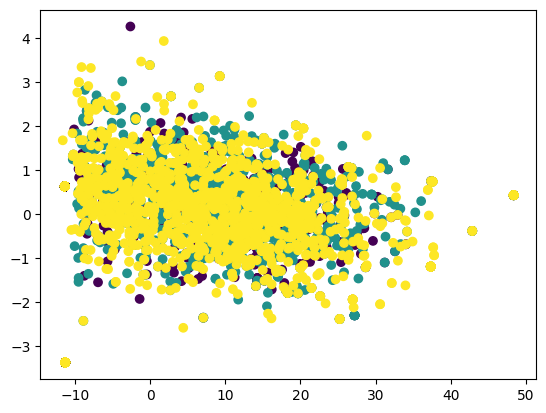

In [30]:
import matplotlib.pyplot as plt
plt.scatter(result["keywords_w2v_svd_1"], result["keywords_w2v_svd_2"],c=result["year"])

In [ ]:
train_df["keywords"]

0       generative, hierarchical, unsupervised, semisu...
1           NLU, word embeddings, representation learning
2                                                        
3       generative adversarial networks, differential ...
4       Generative Models, Latent representations, Pre...
                              ...                        
4969    Neural Processes, Deep Sets, Translation Equiv...
4970                margin, homogeneous, gradient descent
4971    adversarial examples, adversarial training, pr...
4972    Question Answering, Multi-Hop QA, Deep Learnin...
4973                                   federated learning
Name: keywords, Length: 4974, dtype: object